In [1]:
import numpy as np
import math
from scipy.stats import norm
from matplotlib import pyplot as plt

# Графики функции выплат

Пример 1. Постройте графики функции выплат для опционов колл (покупка, продажа) и пут (покупка, продажа).

In [2]:
def payoff_buy_call(S, K):
    return np.maximum(S - K, 0)

def payoff_buy_put(S, K):
    return np.maximum(K - S, 0)

def payoff_sell_call(S, K):
    return -payoff_buy_call(S, K)

def payoff_sell_put(S, K):
    return -payoff_buy_put(S, K)

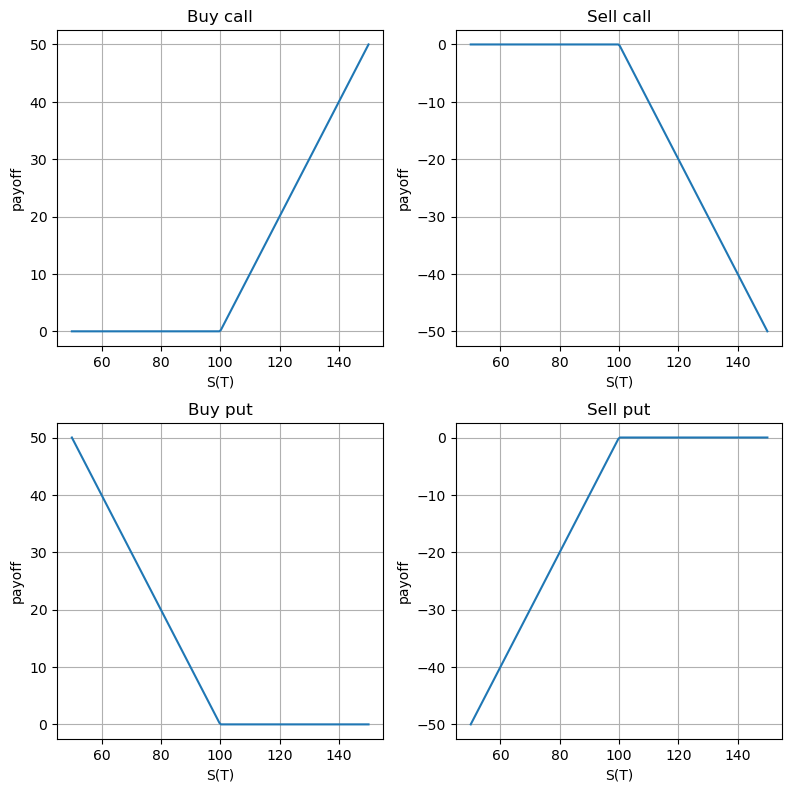

In [3]:
K = 100
S = np.linspace(50, 150, 200)

fig, ax = plt.subplots(2, 2, figsize = (8,8))
ax[0][0].plot(S, payoff_buy_call(S, K))
ax[0][0].set_xlabel("S(T)")
ax[0][0].set_ylabel("payoff")
ax[0][0].grid(True)
ax[0][0].set_title("Buy call")

ax[0][1].plot(S, payoff_sell_call(S, K))
ax[0][1].set_xlabel("S(T)")
ax[0][1].set_ylabel("payoff")
ax[0][1].grid(True)
ax[0][1].set_title("Sell call")

ax[1][0].plot(S, payoff_buy_put(S, K))
ax[1][0].set_xlabel("S(T)")
ax[1][0].set_ylabel("payoff")
ax[1][0].grid(True)
ax[1][0].set_title("Buy put")

ax[1][1].plot(S, payoff_sell_put(S, K))
ax[1][1].set_xlabel("S(T)")
ax[1][1].set_ylabel("payoff")
ax[1][1].grid(True)
ax[1][1].set_title("Sell put")

fig.tight_layout(pad=1.0)

## Задача (Collar)

  Допустим, что текущая цена базового актива равна 70.65, страйки опциона пут и колл равны 65 и 75 соответственно, а оценки их стоимости (премии) равны 2 и 3.25 соответственно. Постройте стратегию, которая заключается в покупке опциона пут и продаже опциона колл.

Определите максимальную прибыль и потери, если цена базового актива может вырасти в два раза (меньше нуля не может быть). Определите интервал безубыточности стратегии с учетом премии. Постройте график функции выплат для опционной стратегии.

https://blog.quantinsti.com/collar-options-trading-strategy-python/


In [4]:
spot_price = 70.65
# Long put
strike_price_long_put = 65
premium_long_put = 2
# Short call
strike_price_short_call = 75
premium_short_call = 3.25
# Stock price range at expiration of the put
sT = np.arange(0,2*spot_price,1)

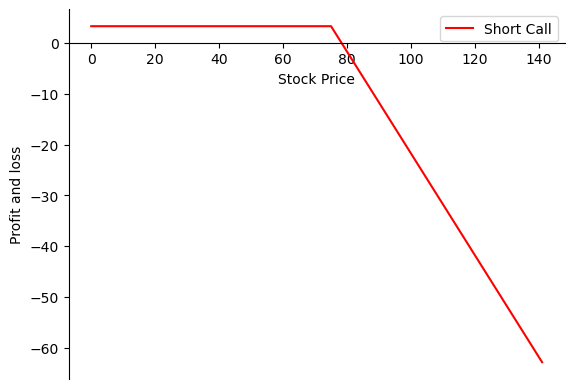

In [5]:
def call_payoff(sT, strike_price, premium):
    return np.where(sT < strike_price, premium,+ premium -sT + strike_price)

payoff_short_call = call_payoff (sT, strike_price_short_call, premium_short_call)
# Plot
fig, ax = plt.subplots()
ax.spines['top'].set_visible(False) # Top border removed
ax.spines['right'].set_visible(False) # Right border removed
ax.spines['bottom'].set_position('zero') # Sets the X-axis in the center
ax.plot(sT,payoff_short_call,label='Short Call',color='r')
plt.xlabel('Stock Price')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()

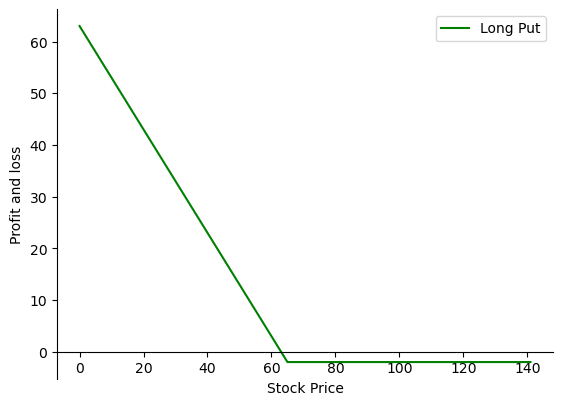

In [6]:
def put_payoff(sT, strike_price, premium):
    return np.where(sT < strike_price, strike_price - sT, 0) - premium

payoff_long_put = put_payoff(sT, strike_price_long_put, premium_long_put)
# Plot
fig, ax = plt.subplots()
ax.spines['top'].set_visible(False) # Top border removed
ax.spines['right'].set_visible(False) # Right border removed
ax.spines['bottom'].set_position('zero') # Sets the X-axis in the center
ax.plot(sT,payoff_long_put,label='Long Put',color='g')
plt.xlabel('Stock Price')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()

Max Profit: 66.25
Max Loss: -64.75


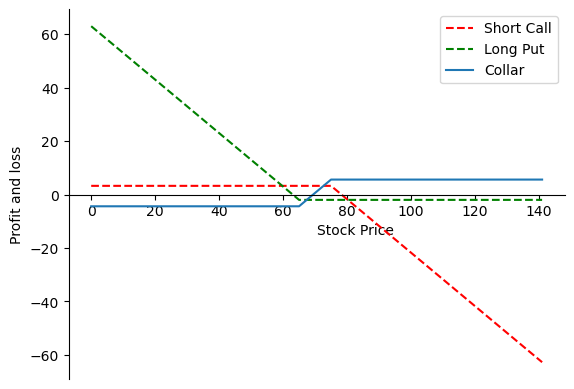

In [7]:
payoff_collar = payoff_short_call + payoff_long_put

print ("Max Profit:", max(payoff_collar))
print ("Max Loss:", min(payoff_collar))
# Plot
fig, ax = plt.subplots()
ax.spines['top'].set_visible(False) # Top border removed
ax.spines['right'].set_visible(False) # Right border removed
ax.spines['bottom'].set_position('zero') # Sets the X-axis in the center

ax.plot(sT,payoff_short_call,'--',label='Short Call',color='r')
ax.plot(sT,payoff_long_put,'--',label='Long Put',color='g')

ax.plot(sT,payoff_collar+sT-spot_price,label='Collar')
plt.xlabel('Stock Price', ha='left')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()

## Задача (Long Straddle)

Допустим, что текущая цена базового актива равна 172.5, страйки опциона пут и колл однинаковые и равны 200, а премии опционов равны 29.25 и 0.04 соответственно. Постройте стратегию, которая заключается в покупке опциона пут и покупке опциона колл.

Определите максимальную прибыль и потери, если цена базового актива может вырасти в два раза (меньше нуля не может быть). Определите интервал безубыточности стратегии с учетом премии. Постройте график функции выплат для опционной стратегии.

https://blog.quantinsti.com/straddle-options-trading-strategy-python/

In [8]:
# Цена базового актива
spot_price  = 172.5

strike_price_long_put = 200
premium_long_put = 29.25

# Long call
strike_price_long_call = 200
premium_long_call = 0.04

# Stock price range at expiration of the put
sT = np.arange(0,2*spot_price,1)

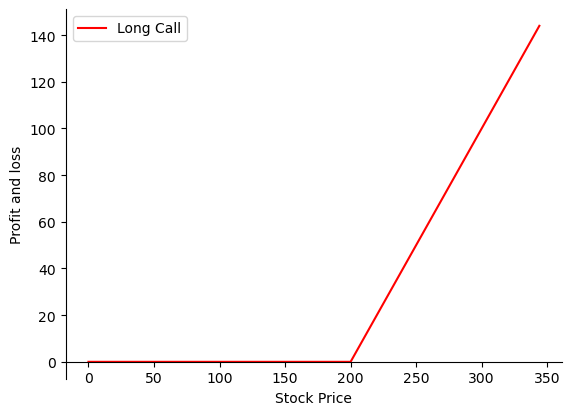

In [9]:
def call_payoff(sT, strike_price, premium):
    return np.where(sT > strike_price, sT - strike_price, 0) - premium
payoff_long_call = call_payoff (sT, strike_price_long_call, premium_long_call)

# Plot
fig, ax = plt.subplots()
ax.spines['top'].set_visible(False) # Top border removed
ax.spines['right'].set_visible(False) # Right border removed
ax.spines['bottom'].set_position('zero') # Sets the X-axis in the center
ax.plot(sT,payoff_long_call,label='Long Call',color='r')
plt.xlabel('Stock Price')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()

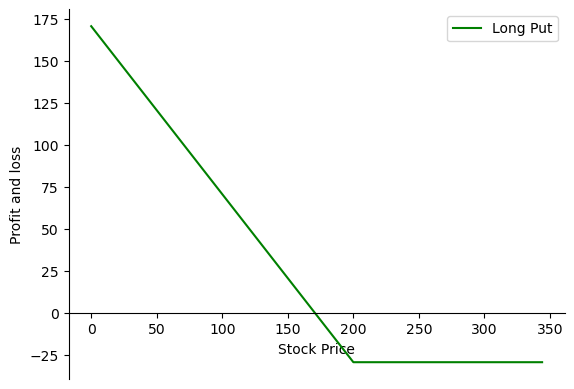

In [10]:
def put_payoff(sT, strike_price, premium):
    return np.where(sT < strike_price, strike_price - sT, 0) - premium
payoff_long_put = put_payoff(sT, strike_price_long_put, premium_long_put)

# Plot
fig, ax = plt.subplots()
ax.spines['top'].set_visible(False) # Top border removed
ax.spines['right'].set_visible(False) # Right border removed
ax.spines['bottom'].set_position('zero') # Sets the X-axis in the center
ax.plot(sT,payoff_long_put,label='Long Put',color='g')
plt.xlabel('Stock Price')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()

Max Profit: Unlimited
Max Loss: -29.29


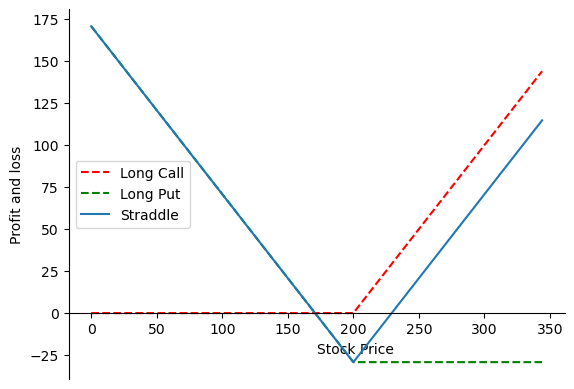

In [11]:
payoff_straddle = payoff_long_call + payoff_long_put

print ("Max Profit: Unlimited")
print ("Max Loss:", min(payoff_straddle))
# Plot
fig, ax = plt.subplots()
ax.spines['top'].set_visible(False) # Top border removed
ax.spines['right'].set_visible(False) # Right border removed
ax.spines['bottom'].set_position('zero') # Sets the X-axis in the center

ax.plot(sT,payoff_long_call,'--',label='Long Call',color='r')
ax.plot(sT,payoff_long_put,'--',label='Long Put',color='g')

ax.plot(sT,payoff_straddle,label='Straddle')
plt.xlabel('Stock Price', ha='left')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()

# Биноминальная модель

In [12]:
def plot_binomial_tree(statePrices, n):
    plt.figure(figsize=(10, 6))
    for i in range(0, n + 1):
        for j in range(0, n + 1):
            if j > i:
                break
            if i < n:
                x1, y1 = [i, i + 1], [2 * j - (i - 1), 2 * j + 1 - (i - 1)]
                plt.plot(x1, y1, marker='o', color="red")
                x1, y1 = [i, i + 1], [2 * j - (i - 1), 2 * j - 1 - (i - 1)]
                plt.plot(x1, y1, marker='o', color="black")
            if statePrices.get("payoff") is not None:
                plt.text(i - 0.2, 2 * j - (i - 1) - 0.6,
                         "%.2f" % statePrices["payoff"][i][j], fontsize=8)
            if statePrices.get("underlying") is not None:
                plt.text(i - 0.2, 2 * j - (i - 1) - 1.0,
                         "%.2f" % statePrices["underlying"][i][j], color="blue", fontsize=8)
    plt.title("Биноминальное дерево")
    plt.xlabel(f"p={statePrices['p']:.1%}, u={statePrices['u']:.3f}, "
               f"r={statePrices['r']:.2%}, q={statePrices['q']:.2%}, dt={statePrices['dt']*365:.1f} days")
    plt.show()

In [13]:
def binomial_tree_pricer(r, q, sigma, T, n, S, payoff, american=True, showStatePrices=False):
    dt = T / n
    up = np.exp(sigma * np.sqrt(dt))
    p0 = (up * np.exp((r - q) * dt) - 1) / (up**2 - 1)
    p1 = 1 - p0
    df = np.exp(-r * dt)

    statePrices = {"p": p0, "u": up, "r": r, "q": q, "dt": dt}
    if showStatePrices:
        statePrices["payoff"] = np.zeros((n + 1, n + 1))
        statePrices["underlying"] = np.zeros((n + 1, n + 1))
    
    p = np.zeros(n + 1)
    for i in range(n + 1):
        p[i] = payoff(S * up**(2 * i - n))
        if showStatePrices:
            statePrices["payoff"][n][i] = p[i]
            statePrices["underlying"][n][i] = S * up**(2 * i - n)
    
    for j in range(n - 1, -1, -1):
        for i in range(j + 1):
            p[i] = (p0 * p[i + 1] + p1 * p[i]) * df
            if american:
                early_exercise = payoff(S * up**(2 * i - j))
                p[i] = max(early_exercise, p[i])
            if showStatePrices:
                statePrices["payoff"][j][i] = p[i]
                statePrices["underlying"][j][i] = S * up**(2 * i - j)

    if showStatePrices:
        plot_binomial_tree(statePrices, n)
    return p[0]

Пример. Текущая цена акций равна 50, волатильность 15%, цена страйк на 1% выше цены базового актива, время до экспирации 1 месяц, безрисковая ставка 5%, на акции начисляются дивиденды 2%. Постройте биноминальное дерево на 5 периодов для европейского опциона пут и оцените его стоимость.

In [14]:
r, q, sigma, T, n, S = 0.05, 0.02, 0.15, 1/12, 5, 50
K = S*1.01
call_payoff = lambda S: max(S - K, 0)
put_payoff = lambda S: max(K - S, 0)

Биноминальное дерево, европейский опцион пут, функция выплат max(K-S, 0)


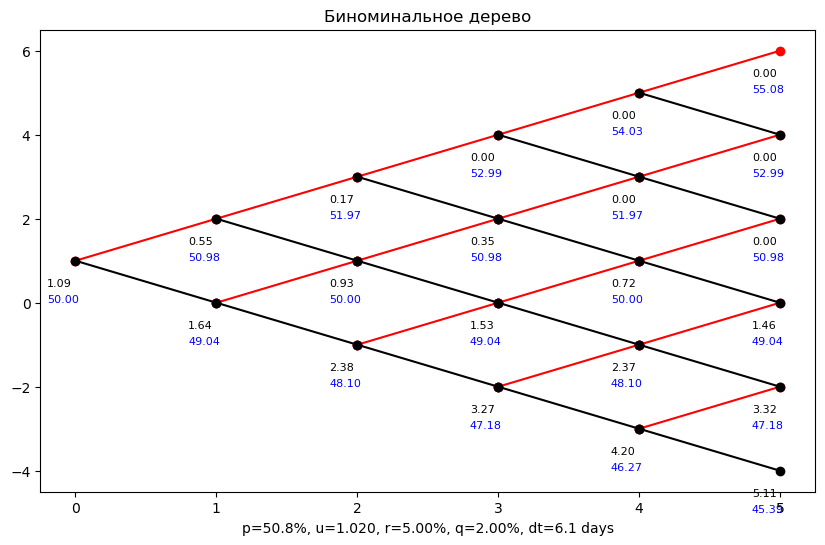

1.0853174417962133

In [15]:
print("Биноминальное дерево, европейский опцион пут, функция выплат max(K-S, 0)")
binomial_tree_pricer(r, q, sigma, T, n, S, put_payoff, american=False, showStatePrices=True)

## Задача (дерево)

Задача. Постройте биноминальные деревья для
*   американского опциона колл,
*   американского опциона пут,
*   европейского опциона колл,
*   европейского опциона пут
и сделайте выводы.

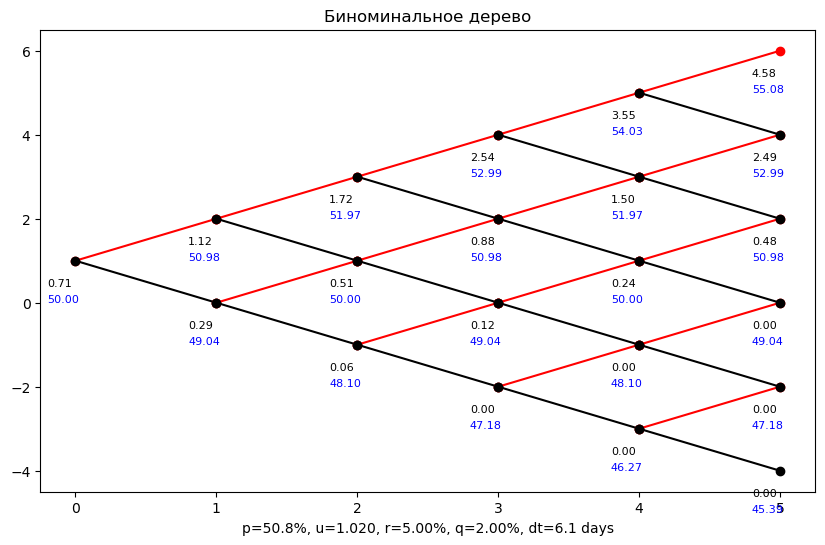

0.7120324211650718

In [16]:
binomial_tree_pricer(r, q, sigma, T, n, S, call_payoff, american=True, showStatePrices=True) # американский call

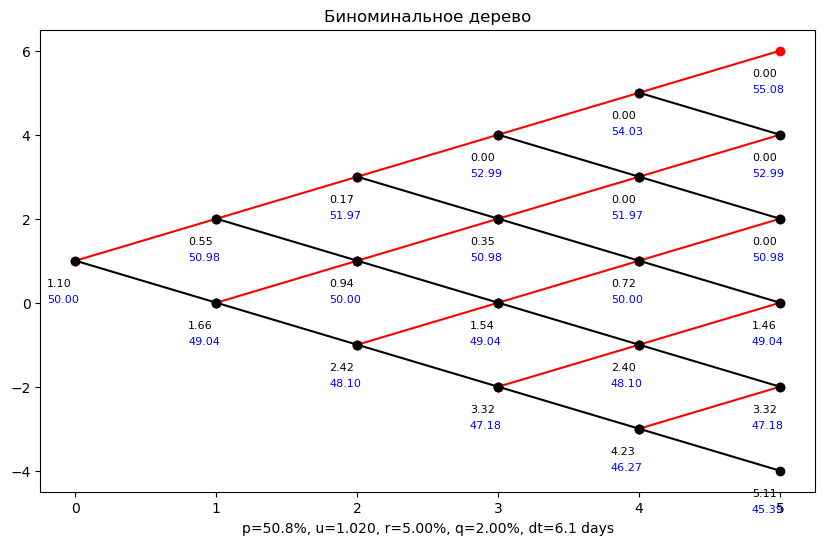

1.0962783164249443

In [17]:
binomial_tree_pricer(r, q, sigma, T, n, S, put_payoff, american=True, showStatePrices=True) # американский пут

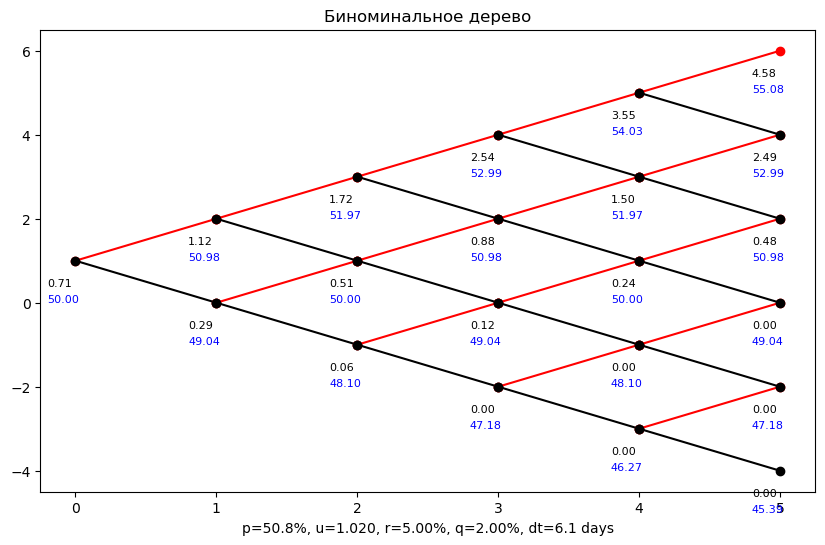

0.7120324211650718

In [18]:
binomial_tree_pricer(r, q, sigma, T, n, S, call_payoff, american=False, showStatePrices=True) # европейский колл


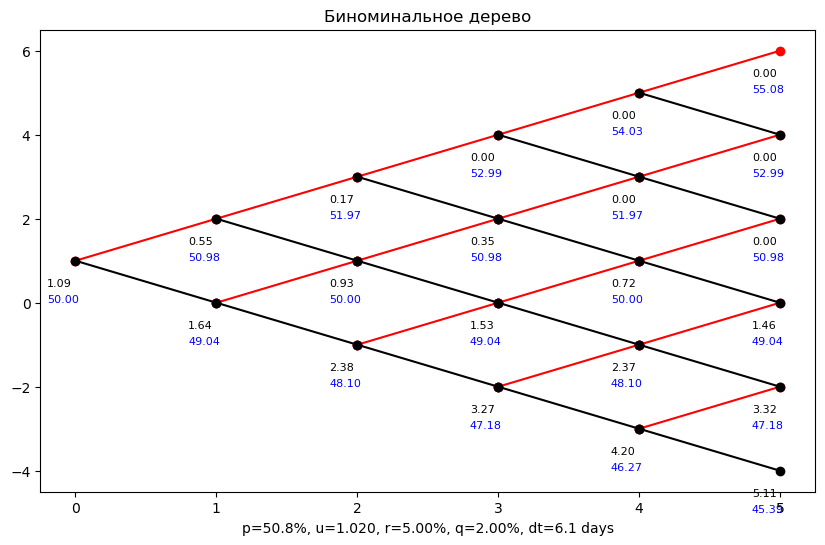

1.0853174417962133

In [19]:
binomial_tree_pricer(r, q, sigma, T, n, S, put_payoff, american=False, showStatePrices=True) #вропейский пут

# Модель Блека-Шоулза

Задача. Допустим, что условия модели Блека-Шоулза выполнены. Текущая цена бездивидентных акций равна 100, волатальность
5%, цена страйк 100, время до экспирации один год, безрисковая
ставка 5%.

Оцените справедливую стоимость опционов колл и пут и вычислите греческие характеристики для опционов как функцию от текущей цены базового актива.

In [20]:
r = 0.07
T = 1
K = 100
S0 = 100
sigma = 0.3
t = 0
q = 0
tau = T - t

## Задача (оценка и паритет)

In [21]:
# оценка опциона колл
def call(S, K, T, sigma, r, q):
    d1 = (np.log (S / K) + (r + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * np.exp(-q * T) * norm.cdf(d1) - K * np.exp (-r * T) * norm.cdf(d2)

In [22]:
# оценка опциона пут
def put(S, K, T, sigma, r, q):
    d1 = (np.log(S / K) + (r + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return K * np.exp(-r * T) * norm.cdf(-d2) - S * np.exp(-q * T) * norm.cdf(-d1)

In [23]:
# оценка опциона пут с использованием паритета
def put_paritet(S, K, T, sigma, r, q):
    return call(S, K, T, sigma, r, q) + K * np.exp(-r * T) - S

Сравните результаты оценки опциона пут с/без паритета цен

In [24]:
print(f"Стоимость опциона пут (прямая формула): {put(S, K, T, sigma, r, q):.4f}")
print(f"Стоимость опциона пут (через паритет): {put_paritet(S, K, T, sigma, r, q):.4f}")

# Проверка разницы
print(f"Разница между двумя методами: {abs(put(S, K, T, sigma, r, q) - put_paritet(S, K, T, sigma, r, q)):.10f}")

Стоимость опциона пут (прямая формула): 43.3792
Стоимость опциона пут (через паритет): 43.3792
Разница между двумя методами: 0.0000000000


In [25]:
params = f"r = {r}, sigma = {sigma}, t = {t}, T = {T}, S0 = {S0}, K = {K}"
print('Параметры:', params)

call_price = call(S0, K, T, sigma, r, q)
print('Оценка опциона колл =', call_price)
put_price  =  put(S0, K, T, sigma, r, q)
print('Оценка опциона пут =', put_price)

Параметры: r = 0.07, sigma = 0.3, t = 0, T = 1, S0 = 100, K = 100
Оценка опциона колл = 15.210500635727158
Оценка опциона пут = 8.449882626321987


## Задача (греческие характеристики)

Вспомогательные функции для аналитического вычисления греческих характеристик.

In [26]:
def delta(S, K, r, T, sigma, option_type):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    if option_type == 'call':
        return norm.cdf(d1)
    elif option_type == 'put':
        return -norm.cdf(-d1)

def gamma(S, K, r, T, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    return norm.pdf(d1) / (S * sigma * np.sqrt(T))

def theta(S, K, r, T, sigma, option_type):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    if option_type == 'call':
        return -(S * norm.pdf(d1) * sigma) / (2 * np.sqrt(T)) - r * K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        return -(S * norm.pdf(d1) * sigma) / (2 * np.sqrt(T)) + r * K * np.exp(-r * T) * norm.cdf(-d2)

def kappa(S, K, r, T, sigma, option_type):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    if option_type == 'call':
        return -np.exp(-r*T)*norm.cdf(d2) 
    elif option_type == 'put':
        return np.exp(-r * T) * norm.cdf(-d2)

def vega(S, K, r, T, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    return S * norm.pdf(d1) * np.sqrt(T)

def rho(S, K, r, T, sigma, option_type):
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    if option_type == 'call':
        return K * T * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        return -K * T * np.exp(-r * T) * norm.cdf(-d2)

Графики зависимости греческих характеристик для опционов от цены базового актива.

In [28]:
def plot_greeks(K=100, r=0.07, T=1, sigma=0.2, N=1000, option_type='call'):
    greeks = {
        'Delta': lambda S: delta(S, K, r, T, sigma, option_type),
        'Gamma': lambda S: gamma(S, K, r, T, sigma),
        'Theta': lambda S: theta(S, K, r, T, sigma, option_type),
        'Kappa': lambda S: kappa(S, K, r, T, sigma, option_type),
        'Vega': lambda S: vega(S, K, r, T, sigma),
        'Rho': lambda S: rho(S, K, r, T, sigma, option_type)
    }

    color = 'green' if option_type == 'call' else 'red'
    S_values = np.linspace(50, 150, N)


    fig, axs = plt.subplots(2, 3, figsize=(16, 10), constrained_layout=True)

    for ax, (name, func) in zip(axs.flat, greeks.items()):
        
        values = [func(S) for S in S_values]
        
        
        ax.plot(S_values, values, label=name, color=color )
        ax.set_title(name, fontsize=14, fontweight='bold')
        ax.set_xlabel("Цена базового актива (S)", fontsize=12)
        ax.set_ylabel(f"{name} значение", fontsize=12)
        ax.legend(fontsize=10)


    fig.suptitle(f"Графики греческих параметров ({option_type.capitalize()} Option)", fontsize=16, fontweight='bold')
    plt.show()

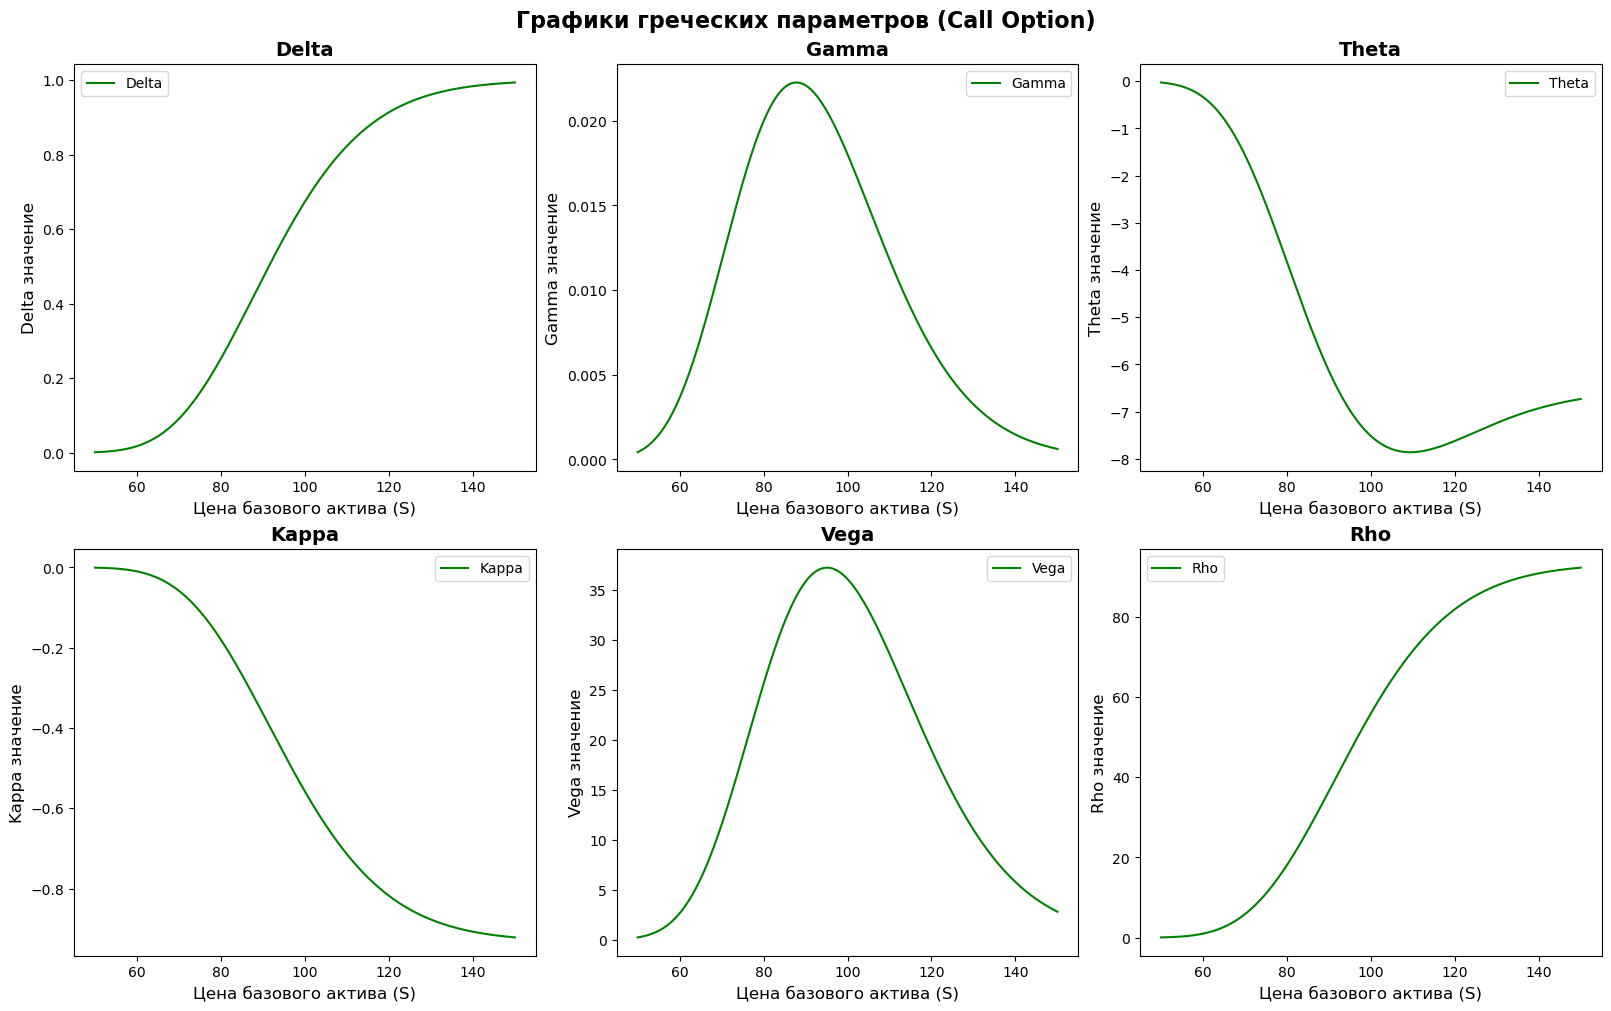

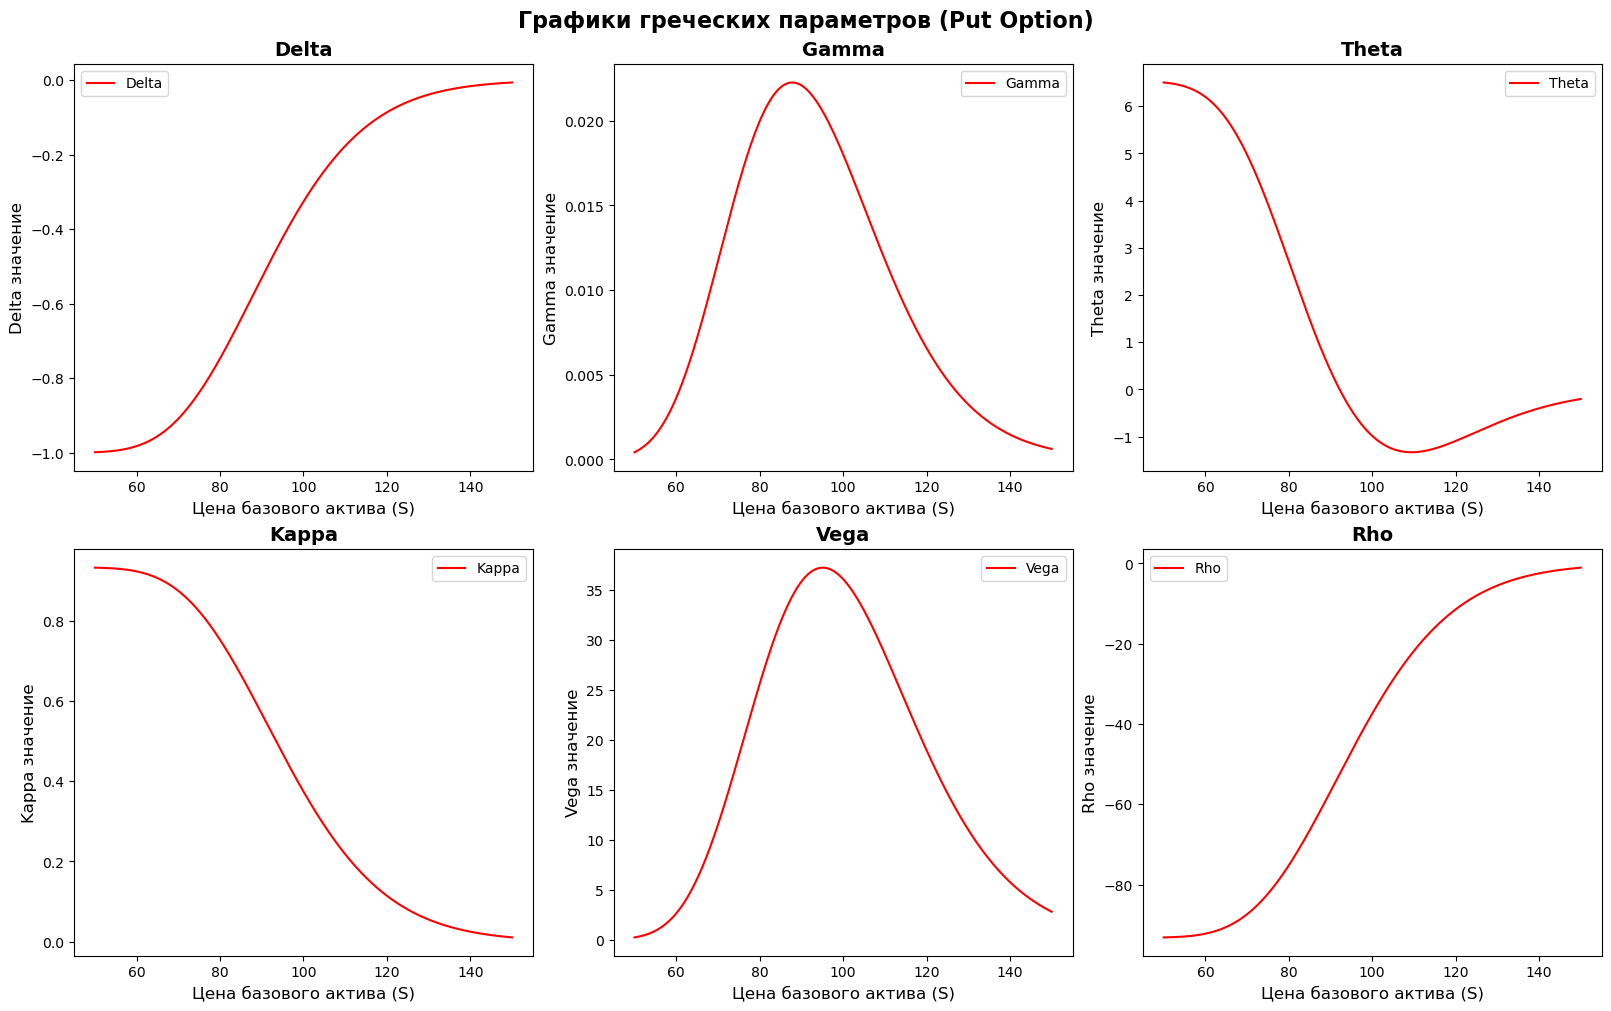

In [29]:
plot_greeks(K=100, r=0.07, T=1, sigma=0.2, N=1000, option_type='call')
plot_greeks(K=100, r=0.07, T=1, sigma=0.2, N=1000, option_type='put')

Задача. Вычислите греческие коэффициенты численно и сравните результаты.

```
def first_derivative(f, x, h=0.001):
    return (f(x + h) - f(x - h)) / (2 * h)

def second_derivative(f, x, h=0.001):
    return (f(x + h) - 2 * f(x) + f(x - h)) / (h * h)
```




In [65]:
h=0.001
r = 0.07
T = 1
K = 100
S0 = 100
sigma = 0.3
t = 0
q = 0
tau = T - t


def first_derivative(f, x, h=0.001):
    return (f(x + h) - f(x - h)) / (2 * h)

def second_derivative(f, x, h=0.001):
    return (f(x + h) - 2 * f(x) + f(x - h)) / (h * h)

def call_price(S):
    return call(S, K, T, sigma, r, q)

def put_price(S):
    return put(S, K, T, sigma, r, q)


delta_num = first_derivative(call_price, S0, h)
gamma_num = second_derivative(call_price, S0, h)
vega_num = first_derivative(lambda sigma: call(S0, K, T, sigma, r, q), sigma, h)
theta_num = first_derivative(lambda T: call(S0, K, T, sigma, r, q), T, h)
rho_num = first_derivative(lambda r: call(S0, K, T, sigma, r, q), r, h)

delta_ana = delta(S0, K, T, sigma, r, q, option_type="call")
gamma_ana = gamma(S0, K, T, sigma, r, q)
vega_ana = vega(S0, K, T, sigma, r, q)
theta_ana = theta(S0, K, T, sigma, r, q, option_type="call")
rho_ana = ro(S0, K, T, sigma, r, q, option_type="call")

# Вывод результатов
print("Сравнение греческих коэффициентов (анализ и численное вычисление):\n")
print(f"Delta:  Аналитическое = {delta_ana:.6f}, Численное = {delta_num:.6f}")
print(f"Gamma:  Аналитическое = {gamma_ana:.6f}, Численное = {gamma_num:.6f}")
print(f"Vega:   Аналитическое = {vega_ana:.6f}, Численное = {vega_num:.6f}")
print(f"Theta:  Аналитическое = {theta_ana:.6f}, Численное = {theta_num:.6f}")
print(f"Rho:    Аналитическое = {rho_ana:.6f}, Численное = {rho_num:.6f}")

Сравнение греческих коэффициентов (анализ и численное вычисление):

Delta:  Аналитическое = 0.649264, Численное = 0.649264
Gamma:  Аналитическое = 0.012356, Численное = 0.012356
Vega:   Аналитическое = 37.068199, Численное = 37.068186
Theta:  Аналитическое = -9.040341, Численное = 9.040341
Rho:    Аналитическое = 49.715868, Численное = 49.715829


Задача. Постройте график трехмерной поверхности для описания зависимости греческих коэффициентов опциона  
*   кол,
*   пут

от стоимости базового актива и
количества дней до экспирации.

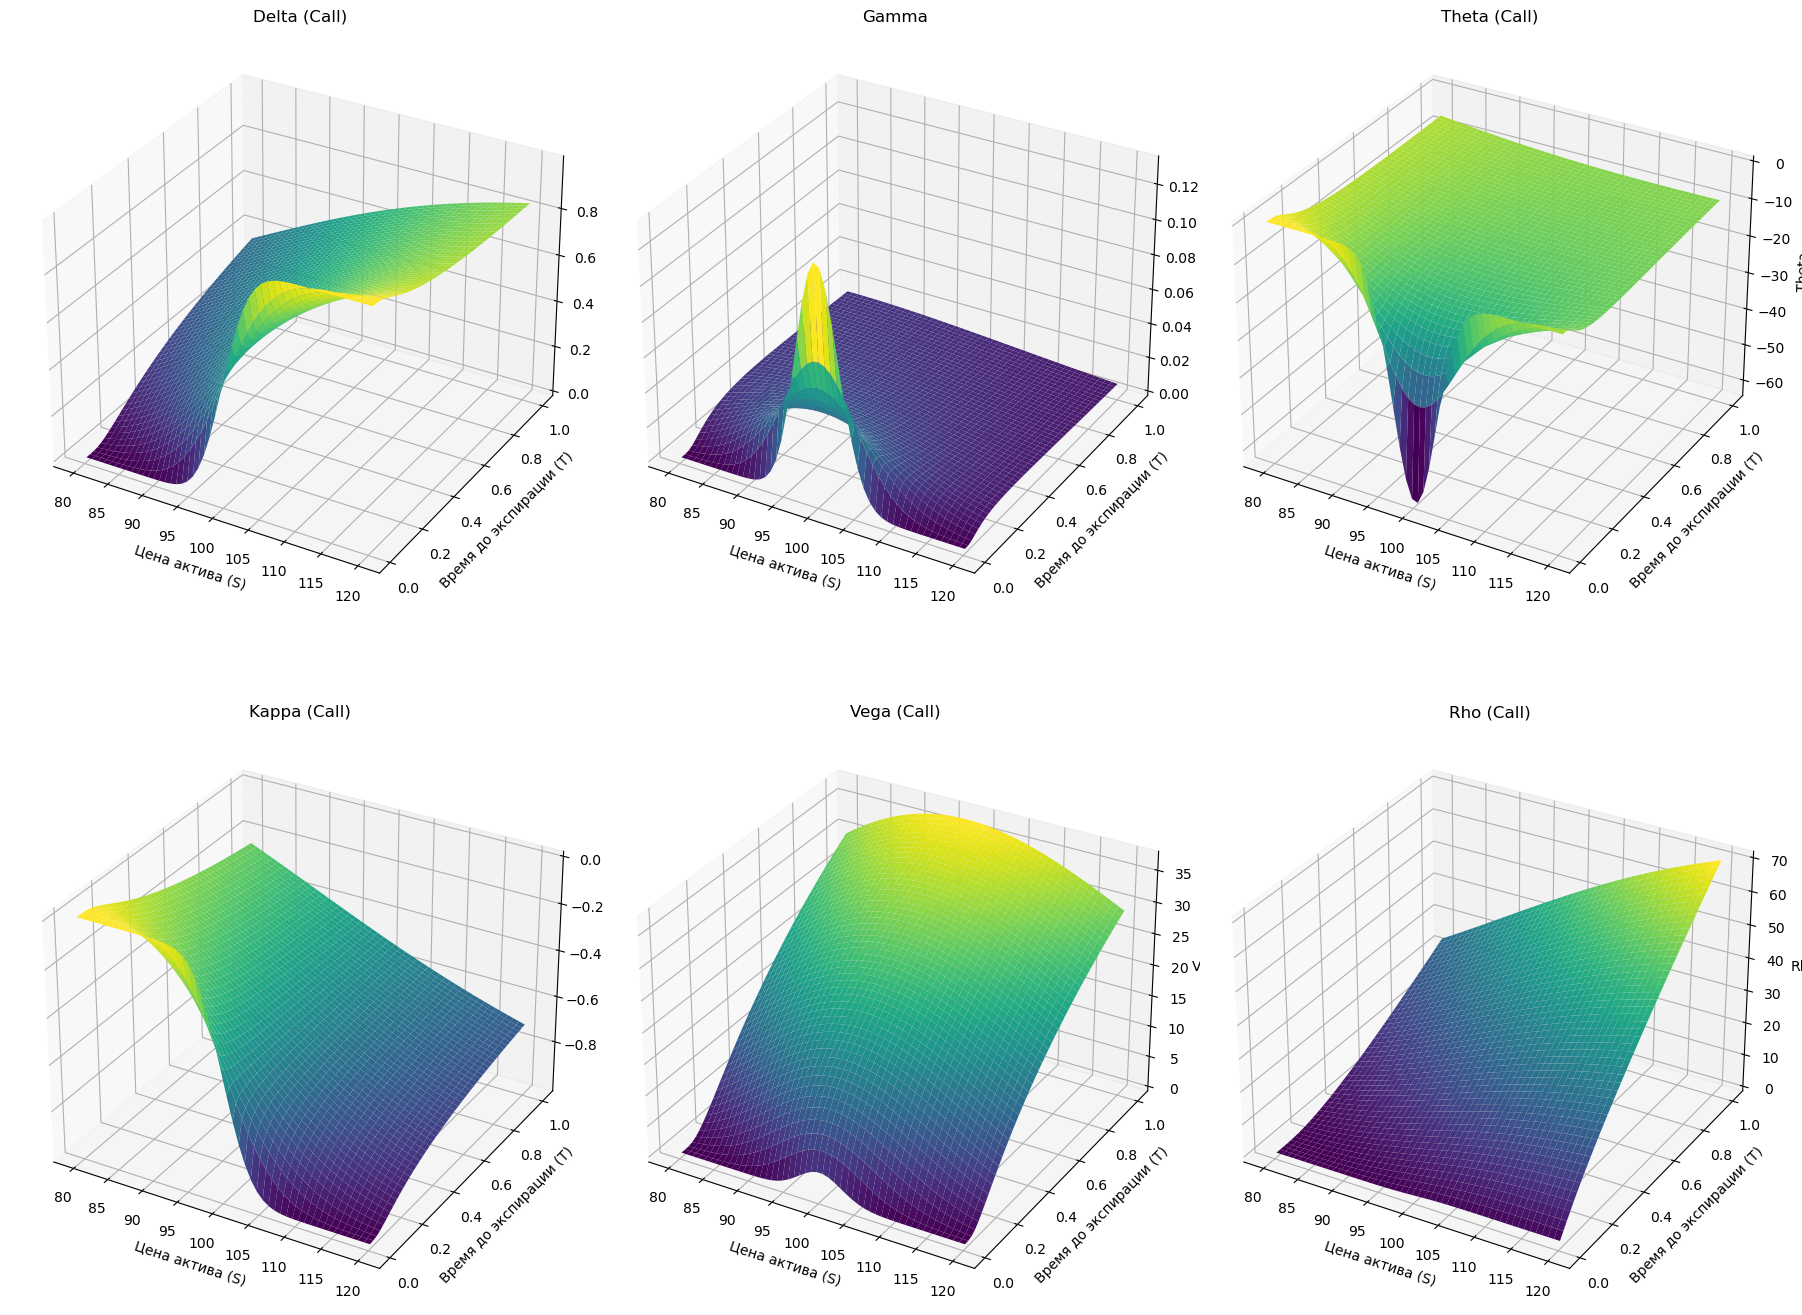

In [30]:
S_range = np.linspace(80, 120, 50)  # Цена актива
T_range = np.linspace(0.01, 1, 50)  # Время до экспирации (от 1 дня до 1 года)
S_grid, T_grid = np.meshgrid(S_range, T_range)

# Параметры опциона
r = 0.07
T = 1
K = 100
S0 = 100
sigma = 0.3
t = 0
q = 0
tau = T - t


Delta_call = delta(S_grid, K, r, T_grid, sigma, "call")
Gamma = gamma(S_grid, K, r, T_grid, sigma)
Theta_call = theta(S_grid, K, r, T_grid, sigma, "call")
Kappa_call = kappa(S_grid, K, r, T_grid, sigma, "call")
Vega = vega(S_grid, K, r, T_grid, sigma)
Rho = rho(S_grid, K, r, T_grid, sigma, "call")

# Построение 3D-графиков
fig = plt.figure(figsize=(18, 15))

# Delta
ax1 = fig.add_subplot(231, projection='3d')
ax1.plot_surface(S_grid, T_grid, Delta_call, cmap='viridis')
ax1.set_title("Delta (Call)")
ax1.set_xlabel("Цена актива (S)")
ax1.set_ylabel("Время до экспирации (T)")
ax1.set_zlabel("Delta")

# Gamma
ax2 = fig.add_subplot(232, projection='3d')
ax2.plot_surface(S_grid, T_grid, Gamma, cmap='viridis')
ax2.set_title("Gamma")
ax2.set_xlabel("Цена актива (S)")
ax2.set_ylabel("Время до экспирации (T)")
ax2.set_zlabel("Gamma")

# Theta
ax3 = fig.add_subplot(233, projection='3d')
ax3.plot_surface(S_grid, T_grid, Theta_call, cmap='viridis')
ax3.set_title("Theta (Call)")
ax3.set_xlabel("Цена актива (S)")
ax3.set_ylabel("Время до экспирации (T)")
ax3.set_zlabel("Theta")

# Kappa
ax4 = fig.add_subplot(234, projection='3d')
ax4.plot_surface(S_grid, T_grid, Kappa_call, cmap='viridis')
ax4.set_title("Kappa (Call)")
ax4.set_xlabel("Цена актива (S)")
ax4.set_ylabel("Время до экспирации (T)")
ax4.set_zlabel("Kappa")

# Vega
ax5 = fig.add_subplot(235, projection='3d')
ax5.plot_surface(S_grid, T_grid, Vega, cmap='viridis')
ax5.set_title("Vega (Call)")
ax5.set_xlabel("Цена актива (S)")
ax5.set_ylabel("Время до экспирации (T)")
ax5.set_zlabel("Vega")

# Rho
ax6 = fig.add_subplot(236, projection='3d')
ax6.plot_surface(S_grid, T_grid, Rho, cmap='viridis')
ax6.set_title("Rho (Call)")
ax6.set_xlabel("Цена актива (S)")
ax6.set_ylabel("Время до экспирации (T)")
ax6.set_zlabel("Rho")

plt.tight_layout()
plt.show()

# Опционная стратегия

## Задача (по вариантам)

Задача. С использование досок опционов [Nasdaq](https://www.nasdaq.com/market-activity/stocks/aapl/option-chain) или [MOEX](https://www.moex.com/ru/derivatives/optionsdesk.aspx) выберите ликвидный актив и реализуейте две [опционных стратегий](https://www.option.ru/glossary/strategy),
$i$ и $i+12$, где $i$ -- ваша фамилия по алфавиту:

1.   Покупка опциона колл. Long Call
1. Продажа опциона колл. Short Call
1. Покупка опциона пут. Long Put
1. Продажа опциона пут. Short Put
1. Бычий колл спрэд. Bull Call Spread
1. Бычий пут спрэд. Bull Put Spread
1. Медвежий колл спрэд. Bear Call Spread
1. Медвежий пут спрэд. Bear Put Spread
1. Покупка бабочки. Long Butterfly
1. Продажа бабочки. Short Butterfly
1. Покупка кондора. Long Condor
1. Продажа кондора. Short Condor
1. Покупка стрэддла. Long Straddle
1. Продажа стрэддла. Short Straddle
1. Покупка стрэнгла. Long Strangle
1. Продажа стрэнгла. Short Strangle
1. Пропорциональный колл спрэд. Call Ratio Spread
1. Пропорциональный пут спрэд. Put Ratio Spread
1. Пропорциональный обратный колл спрэд. Call Ratio Backspread
1. Пропорциональный обратный пут спрэд. Put Ratio Backspread
1. Синтетический длинный фьючерс. Synthetic Long Futures
1. Синтетический короткий фьючерс. Synthetic Short Futures
1. Стрэп. Strap
1. Стрип. Strip
1. Обратный бычий спрэд. Bull Backspread
1. Обратный медвежий спрэд. Bear Backspread

Проанализируйте как влияет соотношение  спот цены базового актива $S$ и цены страйк $K$ для

опциона call:

*   $S > K$ -- в деньгах (in the money),   
*   $S = K$ -- около денег (at the money),
*   $S < K$ --  вне денег (out of the money) и

опциона put:
*   $S < K$ -- в деньгах (in the money),
*   $S = K$ -- около денег (at the money),  
*   $S > K$ -- вне денег (out of the money).

Определите максимальную прибыль и потери, если цена базового актива может вырасти в два раза (меньше нуля не может быть). Определите интервал безубыточности стратегии с учетом премии.

Постройте график функции выплат для каждой опционной стратегии.

AAPL

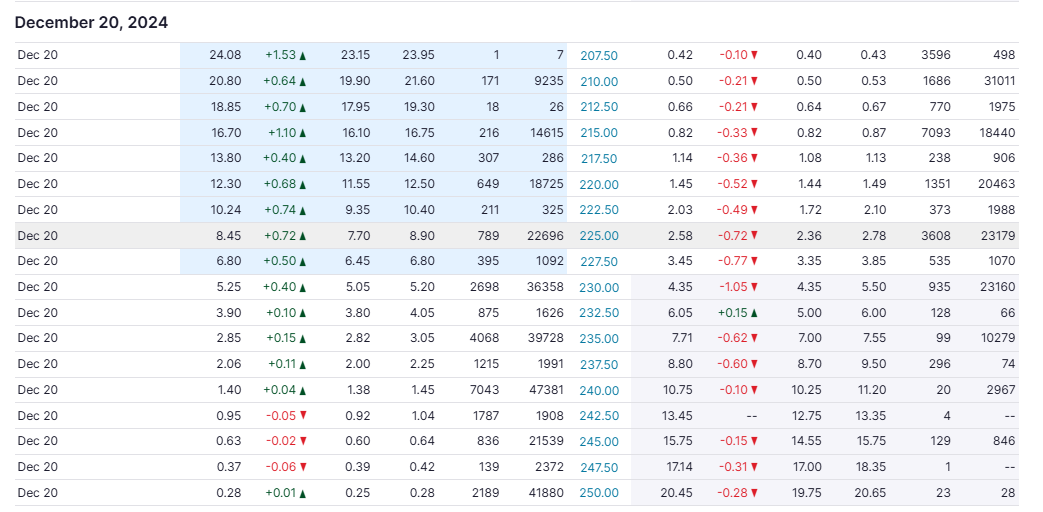

LAST TRADE: $229.87 (AS OF NOV 25, 2024)

___
1. Бычий пут спрэд. Bull Put Spread
1. Пропорциональный колл спрэд. Call Ratio Spread

In [86]:
# BULL PUT SPREAD STRATEGY
S0 = 229.87
T = 25 / 365
SELL_PUT_K = 245
SELL_PUT_price = (14.55 + 15.75)/2
BUY_PUT_K = 220
BUY_PUT_price = (11.55 + 12.5)/2
sT = np.arange(0.5*S0,1.5*S0,1)


def put_payoff(sT, strike_price, premium):
    return np.where(sT < strike_price, strike_price - sT, 0) - premium

payoff_long_put = put_payoff(sT, BUY_PUT_K, BUY_PUT_price)
payoff_short_put = - put_payoff(sT, SELL_PUT_K, SELL_PUT_price)

Max Profit: 3.125
Max Loss: -21.875


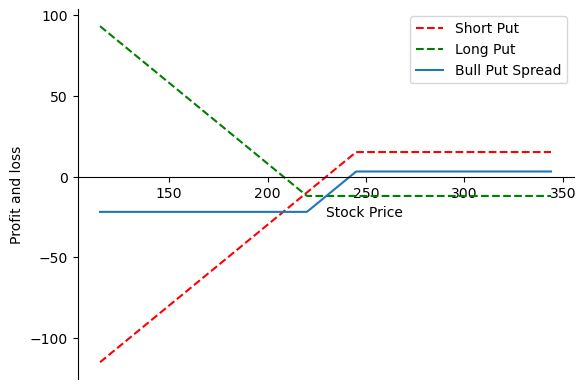

In [87]:
bull_put_spread = payoff_long_put + payoff_short_put

print ("Max Profit:", max(bull_put_spread))
print ("Max Loss:", min(bull_put_spread))
# Plot
fig, ax = plt.subplots()
ax.spines['top'].set_visible(False) # Top border removed
ax.spines['right'].set_visible(False) # Right border removed
ax.spines['bottom'].set_position('zero') # Sets the X-axis in the center

ax.plot(sT,payoff_short_put,'--',label='Short Put',color='r')
ax.plot(sT,payoff_long_put,'--',label='Long Put',color='g')

ax.plot(sT,bull_put_spread,label='Bull Put Spread')
plt.xlabel('Stock Price', ha='left')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()

In [88]:
print('Точка безубыточности =', sT[np.abs(bull_put_spread).argmin()])
# Стратегия на опционах AAPL будет скорее убыточной даже в предположении исполнения на mid price

Точка безубыточности = 241.935


In [98]:
# CALL RATIO SPREAD STRATEGY
S0 = 229.87
T = 25 / 365
BUY_CALL_K = 220
BUY_CALL_price = (11.55 + 12.5)/2
SELL_CALL_K = 240
SELL_CALL_price = (1.38 + 1.45)/2
sT = np.arange(0.5*S0,1.5*S0,1)


def call_payoff(sT, strike_price, premium):
    return np.where(sT > strike_price, sT - strike_price, 0) - premium

payoff_long_call = call_payoff(sT, BUY_CALL_K, BUY_CALL_price)
payoff_short_2_call = -2 * call_payoff(sT, SELL_CALL_K, SELL_CALL_price)

Max Profit: unlimited
Max Loss: -93.13


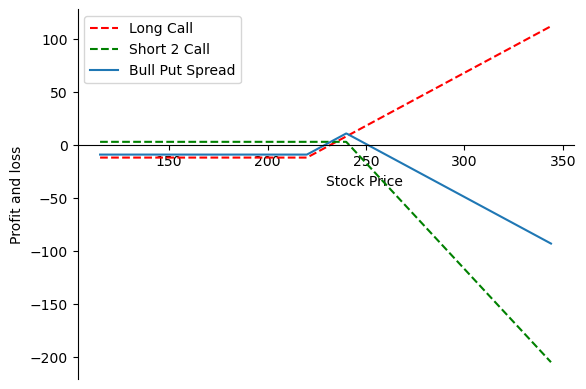

In [100]:
call_ratio_spread = payoff_long_call + payoff_short_2_call

print ("Max Profit: unlimited")
print ("Max Loss:", min(call_ratio_spread))
# Plot
fig, ax = plt.subplots()
ax.spines['top'].set_visible(False) # Top border removed
ax.spines['right'].set_visible(False) # Right border removed
ax.spines['bottom'].set_position('zero') # Sets the X-axis in the center

ax.plot(sT,payoff_long_call,'--',label='Long Call',color='r')
ax.plot(sT,payoff_short_2_call,'--',label='Short 2 Call',color='g')

ax.plot(sT,call_ratio_spread,label='Bull Put Spread')
plt.xlabel('Stock Price', ha='left')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()

## Задача (оптимальный набор)

### Задача

С использование доски опционов [Nasdaq](https://www.nasdaq.com/market-activity/stocks/aapl/option-chain) найдите оптимальный набор опционных контрактов:

$$
X=\{X_c, X_p\},
$$

где

$$
X_c=\{x_i^c \in \mathbb{Z}: L\le x_i^c \le U, i \in I\},
$$

$$
X_p=\{x_i^p \in \mathbb{Z}: L \le x_i^p \le U, i \in I\},
$$

здесь
$x_i^c$, $x_i^p>0$ -- количество опционов колл и пут для покупки, $x_i^c$, $x_i^p<0$ -- для продажи. Если
$x_i^c=0$ или $x_i^p=0$, то $i$-ый контракт
не входит в портфель, $L<0$ и $U>0$ -- нижняя и верхняя границы количества контрактов в портфеле соответственно, $I=\{1,2, \ldots, n\}$ — набор индексов.

### При разработке стратегии придерживаться следующих предположений:
- Покупки и продажи опционов можно осуществлять по ask- и bid-ценам.
- Можно занимать короткие и длинные позиции с учетом ликвидности контракта.
- Стратегия должна иметь защиту от падения и роста цен страйк на \(x\%\) от стоимости базового актива в момент времени \(T\).
- Максимальный убыток стратегии ограничен величиной $\mathcal{L}$, равной \(y\%\) от стоимости базового актива в момент времени \(t=0\).
- Стратегия имеет начальную стоимость \(C(t,X)\), равную \(w\) условных единиц капитала.

[Источник: arXiv](https://arxiv.org/pdf/1707.02087)


In [106]:
import pandas as pd

data = {
    "Exp. Date": ["Dec 20"] * 18,
    "Calls Last": [24.08, 20.80, 18.85, 16.70, 13.80, 12.30, 10.24, 8.45, 6.80, 5.25, 3.90, 2.85, 2.06, 1.40, 0.95, 0.63, 0.37, 0.28],
    "Calls Change": [1.53, 0.64, 0.70, 1.10, 0.40, 0.68, 0.74, 0.72, 0.50, 0.40, 0.10, 0.15, 0.11, 0.04, -0.05, -0.02, -0.06, 0.01],
    "Calls Bid": [23.15, 19.90, 17.95, 16.10, 13.20, 11.55, 9.35, 7.70, 6.45, 5.05, 3.80, 2.82, 2.00, 1.38, 0.92, 0.60, 0.39, 0.25],
    "Calls Ask": [23.95, 21.60, 19.30, 16.75, 14.60, 12.50, 10.40, 8.90, 6.80, 5.20, 4.05, 3.05, 2.25, 1.45, 1.04, 0.64, 0.42, 0.28],
    "Calls Volume": [1, 171, 18, 216, 307, 649, 211, 789, 395, 2698, 875, 4068, 1215, 7043, 1787, 836, 139, 2189],
    "Strike": [207.50, 210.00, 212.50, 215.00, 217.50, 220.00, 222.50, 225.00, 227.50, 230.00, 232.50, 235.00, 237.50, 240.00, 242.50, 245.00, 247.50, 250.00],
    "Puts Last": [0.42, 0.50, 0.66, 0.82, 1.14, 1.45, 2.03, 2.58, 3.45, 4.35, 6.05, 7.71, 8.80, 10.75, 13.45, 15.75, 17.14, 20.45],
    "Puts Change": [-0.10, -0.21, -0.21, -0.33, -0.36, -0.52, -0.49, -0.72, -0.77, -1.05, 0.15, -0.62, -0.60, -0.10, "--", -0.15, -0.31, -0.28],
    "Puts Bid": [0.40, 0.50, 0.64, 0.82, 1.08, 1.44, 1.72, 2.36, 3.35, 4.35, 5.00, 7.00, 8.70, 10.25, 12.75, 14.55, 17.00, 19.75],
    "Puts Ask": [0.43, 0.53, 0.67, 0.87, 1.13, 1.49, 2.10, 2.78, 3.85, 5.50, 6.00, 7.55, 9.50, 11.20, 13.35, 15.75, 18.35, 20.65],
    "Puts Volume": [3596, 1686, 770, 7093, 238, 1351, 373, 3608, 535, 935, 128, 99, 296, 20, 4, 129, 1, 23]
}

options = pd.DataFrame(data)

In [107]:
options

,Exp. Date,Calls Last,Calls Change,Calls Bid,Calls Ask,Calls Volume,Strike,Puts Last,Puts Change,Puts Bid,Puts Ask,Puts Volume
0,Dec 20,24.08,1.53,23.15,23.95,1,207.5,0.42,-0.1,0.40,0.43,3596
1,Dec 20,20.80,0.64,19.90,21.60,171,210.0,0.50,-0.21,0.50,0.53,1686
2,Dec 20,18.85,0.70,17.95,19.30,18,212.5,0.66,-0.21,0.64,0.67,770
3,Dec 20,16.70,1.10,16.10,16.75,216,215.0,0.82,-0.33,0.82,0.87,7093
4,Dec 20,13.80,0.40,13.20,14.60,307,217.5,1.14,-0.36,1.08,1.13,238
5,Dec 20,12.30,0.68,11.55,12.50,649,220.0,1.45,-0.52,1.44,1.49,1351
6,Dec 20,10.24,0.74,9.35,10.40,211,222.5,2.03,-0.49,1.72,2.10,373
7,Dec 20,8.45,0.72,7.70,8.90,789,225.0,2.58,-0.72,2.36,2.78,3608
8,Dec 20,6.80,0.50,6.45,6.80,395,227.5,3.45,-0.77,3.35,3.85,535
9,Dec 20,5.25,0.40,5.05,5.20,2698,230.0,4.35,-1.05,4.35,5.50,935


In [6]:
import numpy as np
from scipy.optimize import linprog

# Данные
strikes = np.array([207.5, 210.0, 212.5, 215.0, 217.5, 220.0, 222.5, 225.0, 227.5, 230.0])  # цены страйк
ask_calls = np.array([23.95, 21.60, 19.30, 16.75, 14.60, 12.50, 10.40, 8.90, 6.80, 5.20])  # ask цены колл
bid_calls = np.array([23.15, 19.90, 17.95, 16.10, 13.20, 11.55, 9.35, 7.70, 6.45, 5.05])  # bid цены колл
ask_puts = np.array([0.43, 0.53, 0.67, 0.87, 1.13, 1.49, 2.10, 2.78, 3.85, 5.50])          # ask цены пут
bid_puts = np.array([0.40, 0.50, 0.64, 0.82, 1.08, 1.44, 1.72, 2.36, 3.35, 4.35])          # bid цены пут

# Заданные параметры
S_0 = 229.87  # текущая цена актива
S_T = 240  # прогнозируемая цена
L, U = -10, 10  # ограничения на количество контрактов
W = 100  # начальная стоимость
L_max = 50  # лимит убытков

# Формирование целевой функции
payoff_calls = np.maximum(S_T - strikes, 0)
payoff_puts = np.maximum(strikes - S_T, 0)

cost_calls = np.where(payoff_calls > 0, ask_calls, -bid_calls)
cost_puts = np.where(payoff_puts > 0, ask_puts, -bid_puts)

c = -np.hstack([payoff_calls - cost_calls, payoff_puts - cost_puts])  # целевая функция: макс. доход

# Ограничения
A_eq = np.zeros((2, len(c)))
A_eq[0, :len(strikes)] = 1  # сумма коллов
A_eq[1, len(strikes):] = 1  # сумма путов
b_eq = [0, 0]  # начальное условие: нейтральный портфель

A_ub = np.vstack([
    c,  # ограничение на убыток
    np.identity(len(c)),  # ограничения по ликвидности
    -np.identity(len(c))
])
b_ub = [L_max] + [U] * len(c) + [-L] * len(c)

# Решение
bounds = [(L, U)] * len(c)
result = linprog(c, A_ub=A_ub, b_ub=b_ub, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='highs')

# Вывод
if result.success:
    portfolio = result.x
    print("Оптимальный портфель:", portfolio)
    print("Ожидаемая прибыль:", -result.fun)
else:
    print("Не удалось найти решение.")


Оптимальный портфель: [ 10.  10.  10.  10.  10. -10. -10. -10. -10. -10. -10. -10. -10. -10.
 -10.  10.  10.  10.  10.  10.]
Ожидаемая прибыль: 198.79999999999995
